In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load annotation file

In [ ]:
df = pd.read_csv("E:\MSc Data Science\Third term\Research Project\general\charade\CharadesEgo\CharadesEgo_v1_train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              6167 non-null   object 
 1   subject         6167 non-null   object 
 2   scene           6167 non-null   object 
 3   quality         6147 non-null   float64
 4   relevance       6113 non-null   float64
 5   verified        6167 non-null   object 
 6   script          6167 non-null   object 
 7   objects         6165 non-null   object 
 8   descriptions    6167 non-null   object 
 9   actions         6158 non-null   object 
 10  length          6167 non-null   float64
 11  egocentric      6167 non-null   object 
 12  charades_video  4934 non-null   object 
dtypes: float64(3), object(10)
memory usage: 626.5+ KB


In [16]:
df['actions'].value_counts().sort_values(ascending=False)

actions
c011 0.00 30.75;c059 0.00 30.75                                                                                                                                                                                                                                                                                                                                                2
c051 0.00 30.42;c047 0.00 30.42;c059 0.00 30.42                                                                                                                                                                                                                                                                                                                                2
c012 0.00 31.42;c013 0.00 31.42;c038 0.00 31.42                                                                                                                                                                                                               

We should expect each value of `actions` are in two rows (one for egocentric view and one for exocentric view) 

# Transform the annotation file

In [17]:
rows = []
for _, r in df.iterrows():
  vid = r['id']
  actions = r['actions']
  if (isinstance(actions, str)):
    for trip in actions.split(';'):
      cls, st, en = trip.split()
      rows.append({'video': vid, 'class': cls, 'start': float(st), 'end': float(en)})

all_actions = pd.DataFrame(rows)

In [18]:
all_actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68536 entries, 0 to 68535
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   video   68536 non-null  object 
 1   class   68536 non-null  object 
 2   start   68536 non-null  float64
 3   end     68536 non-null  float64
dtypes: float64(2), object(2)
memory usage: 2.1+ MB


In [19]:
all_actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68536 entries, 0 to 68535
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   video   68536 non-null  object 
 1   class   68536 non-null  object 
 2   start   68536 non-null  float64
 3   end     68536 non-null  float64
dtypes: float64(2), object(2)
memory usage: 2.1+ MB


In [20]:
all_actions.head()

,video,class,start,end
0,D3TR8EGO,c156,3.9,12.0
1,D3TR8EGO,c061,8.2,12.5
2,D3TR8EGO,c106,9.9,18.4
3,D3TR8EGO,c067,12.8,17.9
4,D3TR8EGO,c008,12.2,18.7


### Visualize actions intervals

In [22]:
def plot_actions_intervals(annots_df, vid):
    # Get rows associated with vid
    video = annots_df[annots_df["video"] == vid]

    # Calculate durations
    # durations = [end - start for start, end in zip(video["start"], video["end"])]
    durations = video["end"] - video["start"]

    # Create a horizontal bar chart
    fig, ax = plt.subplots(figsize=(10, 4))

    # Plot each action as a horizontal bar
    for i, (cls, start, duration) in enumerate(
        zip(video["class"], video["start"], durations)
    ):
        ax.barh(i, duration, left=start, height=0.6, label=cls)
        ax.text(
            start + duration / 2,
            i,
            cls,
            va="center",
            ha="center",
            color="white",
            fontsize=10,
        )

    # Formatting
    ax.set_xlabel("Time (s)")
    ax.set_yticks(range(len(video["class"])))
    ax.set_yticklabels(video["class"])
    ax.set_title(f"Action Class Intervals for Video {vid}")
    ax.grid(True, axis="x", linestyle="--", alpha=0.6)

    plt.tight_layout()
    plt.show()

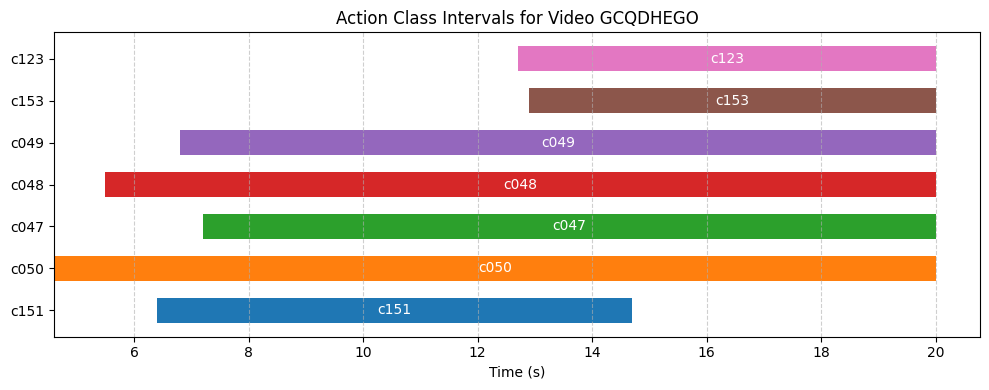

In [23]:
plot_actions_intervals(all_actions, 'GCQDHEGO')